In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers.experimental import AdamW
from fcn import fcn
from data_loader import dataset
from parameters import base
from utils import show_predictions

In [38]:
img_size, batch, buffer = base()
database = dataset(batch, buffer)

metrics = ["accuracy"]
optimizer = Adam(learning_rate=0.001) # Adam(learning_rate = 0.001) AdamW() RMSprop(lr=0.001)
loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model = fcn(img_size)
model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = metrics)
model.summary() # 22,269,973 parameters

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                                )                                                          

In [39]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir, {
    'num_relu_units': 512,
    'dropout': 0.2
})

In [40]:
n_epochs = 10
epoch_steps = 500 // batch
valid_steps = 200 // batch
model_history = model.fit(database['train'], epochs = n_epochs,
                          steps_per_epoch = epoch_steps,
                          validation_steps = valid_steps,
                          validation_data = database['valid'],
                          callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/10
100/100 [==============================] - 129s 1s/step - loss: 3.5368 - accuracy: 0.1781 - val_loss: 3.3130 - val_accuracy: 0.2204
Epoch 2/10
100/100 [==============================] - 118s 1s/step - loss: 3.1574 - accuracy: 0.2468 - val_loss: 3.0092 - val_accuracy: 0.2833
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 2.9899 - accuracy: 0.2810 - val_loss: 2.9783 - val_accuracy: 0.2867
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 2.9898 - accuracy: 0.2949 - val_loss: 2.8585 - val_accuracy: 0.3418
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 2.8957 - accuracy: 0.3214 - val_loss: 2.7402 - val_accuracy: 0.3416
Epoch 6/10
100/100 [==============================] - 117s 1s/step - loss: 2.8381 - accuracy: 0.3321 - val_loss: 2.8513 - val_accuracy: 0.3275
Epoch 7/10
100/100 [==============================] - 126s 1s/step - loss: 2.8808 - accuracy: 0.3214 - val_loss: 2.6563 - val_accuracy: 0.3371

1/1 [==============================] - 0s 269ms/step


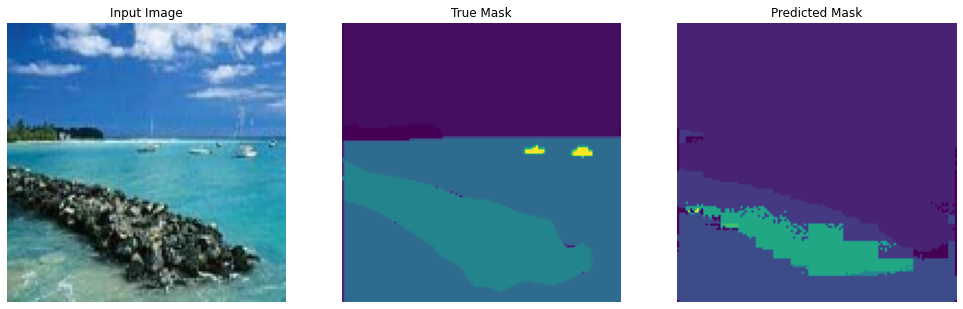

In [16]:
show_predictions(database['train'], model)

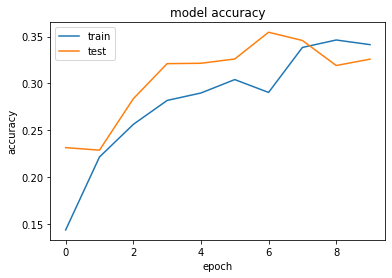

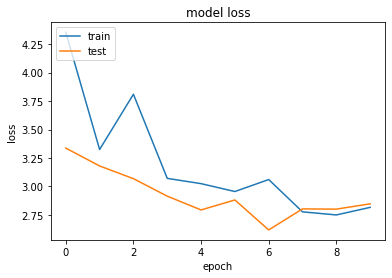

In [37]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()